# 31. TETRA: CLUSTER MODEL TRAINING
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

tetra = pd.read_csv('data/tetra_df')
print(tetra.shape)
tetra.head()

(400, 4)


,col1,col2,col3,labels
0,1.295,0.051,-0.385,1
1,1.409,-0.035,-0.252,1
2,1.097,0.246,-0.415,1
3,1.463,0.265,-0.513,1
4,1.603,0.081,-0.470,1


In [2]:
tetra['labels'].value_counts()

4    100
3    100
2    100
1    100
Name: labels, dtype: int64

In [4]:
X_train = tetra.drop('labels', axis=1)
X_train.shape

(400, 3)

## 2. The Elbow Method for Finding Optimal N-Clusters

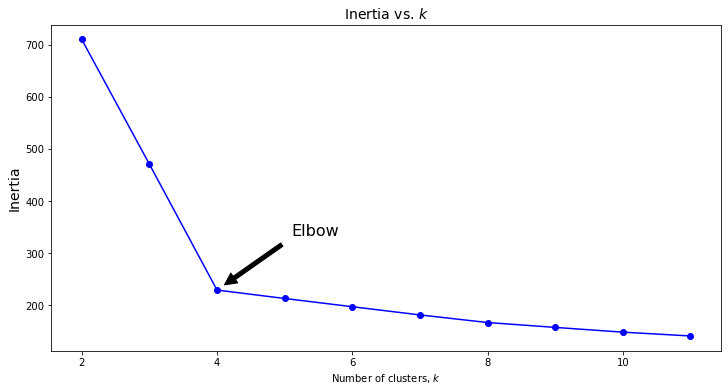

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(2, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.40, 0.40),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## 3. The Silhouette Score Method for Finding Optimal N_Clusters

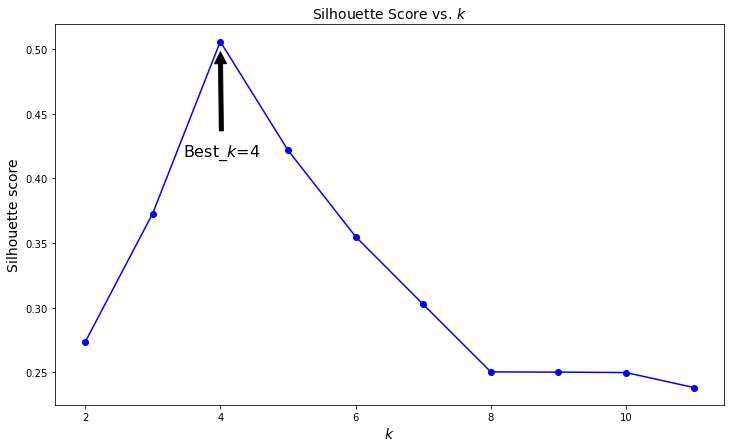

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) 
                     for model in kmeans_per_k]

plt.figure(figsize=(12, 7))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.title('Silhouette Score vs. $k$', fontsize=14)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Best_$k$=4',
             xy=(4, silhouette_scores[2]),
             xytext=(0.25, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()